# Flatiron Data Science Phase 1 Project

## **Author:** Madeleine Reiser
***

## Overview

This project used exploratory data analysis to help the business stake owners of a potential new movie streaming service figure out the best ways to make box office revenue. Datasets from IMDB and Box Office Mojo were analyzed to show what movies have made the most money, which are the highest rated, and which are the most popular, from the years 2010-2018. 

## Business Problem

Microsoft Stake Owners are interested in developing their own streaming service but aren’t sure what kinds of movies do the best in the box office. 


## Data Understanding

Using datasets from IMDB and Box Office Mojo, this project explores how box office revenue is correlated with variables such as ratings, popularity (which is measured by number of reviews left by viewers), specific studios and genres.  


## Import necessary packages and load Datasets

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import gzip
%matplotlib inline

In [4]:
#load data 
imdb_title_ratings = pd.read_csv('data/imdb.title.ratings.csv.gz')
imdb_title_basics = pd.read_csv('data/imdb.title.basics.csv.gz')
bom_movie_gross = pd.read_csv('data/bom.movie_gross.csv.gz')

## IMDB Ratings Dataset

Contains "tconst", which appears to be the code for each movie, the film's average rating, and the number of votes on IMDB

In [5]:
imdb_title_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   tconst         73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


In [5]:
imdb_title_ratings.head()

,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


## IMDB Basic Dataset

Contains more information for each film on IMDB including "tconst" again, Primary and Original titles, start year, runtime in minutes, and the genre. 

In [6]:
imdb_title_basics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   tconst           146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


## Box Office Mojo dataset

Contains the title, studio, domestic gross, foreign gross and year released according to data from Box Office Mojo 

In [7]:
bom_movie_gross.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [8]:
bom_movie_gross.describe()


,domestic_gross,year
count,3.359000e+03,3387.000000
mean,2.874585e+07,2013.958075
std,6.698250e+07,2.478141
min,1.000000e+02,2010.000000
25%,1.200000e+05,2012.000000
50%,1.400000e+06,2014.000000
75%,2.790000e+07,2016.000000
max,9.367000e+08,2018.000000


# Data Preparation


## Box Office Mojo dataset

In [9]:
bom_movie_gross = pd.read_csv('bom.movie_gross.csv.gz')
bom_movie_gross.sort_values(by='year', ascending=False)
bom_movie_gross.sort_values(by='domestic_gross', ascending=False).head(30)
bom_movie_gross.info()
#last year is 2018
#includes studio
#foreign_gross is an object
bom_movie_gross.columns = ['Title', 'Studio', 'Domestic Gross', 
                        'Foreign Gross', 'BOM Year']
bom_movie_gross

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


,Title,Studio,Domestic Gross,Foreign Gross,BOM Year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


## Merging the two IMDB Sets

I merged both IMDB Datasets to keep all IMDB data together. 

In [10]:
#Join imdb_title_basics and imdb_title_ratings 
imdb_ratings_joined = imdb_title_basics.merge(imdb_title_ratings, on = 'tconst',  how = 'outer')
imdb_ratings_joined.sort_values(by = 'start_year', ascending = False)
#data begins at 2010 and goes up to 2115, limit year to 2010-2018


,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
89506,tt5174640,100 Years,100 Years,2115,NaN,Drama,NaN,NaN
96592,tt5637536,Avatar 5,Avatar 5,2027,NaN,"Action,Adventure,Fantasy",NaN,NaN
2949,tt10300398,Untitled Star Wars Film,Untitled Star Wars Film,2026,NaN,Fantasy,NaN,NaN
52213,tt3095356,Avatar 4,Avatar 4,2025,NaN,"Action,Adventure,Fantasy",NaN,NaN
105187,tt6149054,Fantastic Beasts and Where to Find Them 5,Fantastic Beasts and Where to Find Them 5,2024,NaN,"Adventure,Family,Fantasy",NaN,NaN
...,...,...,...,...,...,...,...,...
74712,tt4264626,Civil War Life: Shot to Pieces,Civil War Life: Shot to Pieces,2010,79.0,Documentary,5.7,6.0
14471,tt1716746,Heinrich Kieber - Datendieb,Heinrich Kieber - Datendieb,2010,52.0,Documentary,7.7,6.0
74692,tt4263706,Mushrooms of America,Mushrooms of America,2010,46.0,"Adventure,Comedy,Documentary",NaN,NaN
118065,tt7059624,Zamana,Zamana,2010,140.0,Drama,NaN,NaN


I renamed the columns to make them more readable. 

In [11]:
imdb_ratings_joined.columns = ['tconst', 'Title', 'Original Title', 
                               'IMDB Year', 'Runtime (in minutes)', 
                              'Genres', 'Average Rating', 'Number of Votes']
imdb_ratings_joined.sort_values(by = 'IMDB Year')

,tconst,Title,Original Title,IMDB Year,Runtime (in minutes),Genres,Average Rating,Number of Votes
9599,tt1566491,Brainiacs in La La Land,Brainiacs in La La Land,2010,NaN,Comedy,NaN,NaN
43264,tt2578092,Fireplace for your Home: Crackling Fireplace w...,Fireplace for your Home: Crackling Fireplace w...,2010,61.0,Music,6.9,17.0
11550,tt1634300,Role/Play,Role/Play,2010,85.0,"Drama,Romance",5.0,894.0
11551,tt1634332,Johan1,Johan Primero,2010,78.0,"Comedy,Drama,Romance",7.1,124.0
11552,tt1634334,Hands Up,Les mains en l'air,2010,90.0,Drama,6.2,271.0
...,...,...,...,...,...,...,...,...
2948,tt10300396,Untitled Star Wars Film,Untitled Star Wars Film,2024,NaN,NaN,NaN,NaN
52213,tt3095356,Avatar 4,Avatar 4,2025,NaN,"Action,Adventure,Fantasy",NaN,NaN
2949,tt10300398,Untitled Star Wars Film,Untitled Star Wars Film,2026,NaN,Fantasy,NaN,NaN
96592,tt5637536,Avatar 5,Avatar 5,2027,NaN,"Action,Adventure,Fantasy",NaN,NaN


I limited the data from the joined IMDB datasets to 2018, which is the last year this set was updated. 

In [12]:
#get relevant years (2010-2018) 
imdb_ratings_joined2010_2018 = imdb_ratings_joined.loc[imdb_ratings_joined['IMDB Year'] <= 2018]
imdb_ratings_joined2010_2018.sort_values(by = 'IMDB Year', ascending = False)
imdb_ratings_joined2010_2018.sort_values(by = 'Average Rating', ascending = False)



,tconst,Title,Original Title,IMDB Year,Runtime (in minutes),Genres,Average Rating,Number of Votes
85712,tt4960818,Revolution Food,Revolution Food,2015,70.0,Documentary,10.0,8.0
117359,tt6991826,A Dedicated Life: Phoebe Brand Beyond the Group,A Dedicated Life: Phoebe Brand Beyond the Group,2015,93.0,Documentary,10.0,5.0
44279,tt2632430,Hercule contre Hermès,Hercule contre Hermès,2012,72.0,Documentary,10.0,5.0
4016,tt10378660,The Dark Knight: The Ballad of the N Word,The Dark Knight: The Ballad of the N Word,2018,129.0,"Comedy,Drama",10.0,5.0
1857,tt10176328,Exteriores: Mulheres Brasileiras na Diplomacia,Exteriores: Mulheres Brasileiras na Diplomacia,2018,52.0,Documentary,10.0,5.0
...,...,...,...,...,...,...,...,...
146136,tt9916186,Illenau - die Geschichte einer ehemaligen Heil...,Illenau - die Geschichte einer ehemaligen Heil...,2017,84.0,Documentary,NaN,NaN
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary,NaN,NaN
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy,NaN,NaN
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,NaN,NaN,NaN


I dropped rows where average rating is NaN


In [13]:
rating_na_dropped = imdb_ratings_joined2010_2018[imdb_ratings_joined2010_2018['Average Rating'].notna()]


I limited the average rating to 8 or better, and show the value counts per genre. This merged dataset doesn't include data from BOM, only IMDB.

In [14]:
#limit average rating to 8 or better
rating_na_dropped.loc[rating_na_dropped['Average Rating'] >= 8]
imdb_8_or_better = rating_na_dropped.loc[rating_na_dropped['Average Rating'] >= 8]
#genres where rating was better than an 8
imdb_8_or_better['Genres'].value_counts().head(10)


Documentary                      2715
Drama                            1234
Comedy                            402
Comedy,Drama                      220
Documentary,Music                 204
Documentary,Drama                 158
Biography,Documentary             155
Biography,Documentary,History     142
Documentary,History               131
Biography,Documentary,Drama       117
Name: Genres, dtype: int64

## Merge the BOM dataset with the IMDB dataset

Joined the tables by 'Title', and dropped the year given by BOM since we already have the year from IMDB, which provides most of the data. 

In [15]:
alljoined = bom_movie_gross.merge(rating_na_dropped, on = 'Title',  how = 'inner')
alljoined
#sort by # votes, gives best idea of rating
alljoined.sort_values(by = 'Domestic Gross', ascending = False)


#dropping BOM year because it has the least entries and most of 
#the data is from IMDB 
alljoined.drop(['BOM Year'], axis='columns', inplace=True)
alljoined['Foreign Gross'] = pd.to_numeric(alljoined['Foreign Gross'], errors = 'coerce')
alljoined.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 3015 entries, 0 to 3014
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Title                 3015 non-null   object 
 1   Studio                3012 non-null   object 
 2   Domestic Gross        2993 non-null   float64
 3   Foreign Gross         1817 non-null   float64
 4   tconst                3015 non-null   object 
 5   Original Title        3015 non-null   object 
 6   IMDB Year             3015 non-null   int64  
 7   Runtime (in minutes)  2970 non-null   float64
 8   Genres                3008 non-null   object 
 9   Average Rating        3015 non-null   float64
 10  Number of Votes       3015 non-null   float64
dtypes: float64(5), int64(1), object(5)
memory usage: 282.7+ KB


I further sliced the dataset to limit results to any films with an average rating of 8 or better to explore which films are highest rated

In [16]:
alljoined_8_or_better = alljoined.loc[alljoined['Average Rating'] >= 8]
#limit alljoined table to ratings 8 or better
alljoined_8_or_better.sort_values(by = 'Average Rating')
alljoined_8_or_better['Genres'].value_counts()

Drama                         18
Documentary                   10
Action,Adventure,Sci-Fi        4
Adventure,Animation,Comedy     4
Biography,Drama,History        3
                              ..
Biography,Drama,Sport          1
Mystery,Thriller               1
Drama,Western                  1
Biography,Comedy,Drama         1
Action                         1
Name: Genres, Length: 69, dtype: int64

In [17]:
alljoined.sort_values(by = 'Domestic Gross', ascending = False)

,Title,Studio,Domestic Gross,Foreign Gross,tconst,Original Title,IMDB Year,Runtime (in minutes),Genres,Average Rating,Number of Votes
2740,Black Panther,BV,700100000.0,646900000.0,tt1825683,Black Panther,2018,134.0,"Action,Adventure,Sci-Fi",7.3,516148.0
2739,Avengers: Infinity War,BV,678800000.0,NaN,tt4154756,Avengers: Infinity War,2018,149.0,"Action,Adventure,Sci-Fi",8.5,670926.0
1608,Jurassic World,Uni.,652300000.0,NaN,tt0369610,Jurassic World,2015,124.0,"Action,Adventure,Sci-Fi",7.0,539338.0
2424,Star Wars: The Last Jedi,BV,620200000.0,712400000.0,tt2527336,Star Wars: Episode VIII - The Last Jedi,2017,152.0,"Action,Adventure,Fantasy",7.1,462903.0
2742,Incredibles 2,BV,608600000.0,634200000.0,tt3606756,Incredibles 2,2018,118.0,"Action,Adventure,Animation",7.7,203510.0
...,...,...,...,...,...,...,...,...,...,...,...
2162,Solace,LGP,NaN,22400000.0,tt2140411,Solace,2013,76.0,Thriller,7.2,59.0
2163,Solace,LGP,NaN,22400000.0,tt3240102,Solace,2018,81.0,Drama,4.9,28.0
2281,Viral,W/Dim.,NaN,552000.0,tt2594078,Viral,2013,95.0,"Comedy,Horror,Thriller",4.4,227.0
2282,Viral,W/Dim.,NaN,552000.0,tt2597892,Viral,2016,85.0,"Drama,Horror,Sci-Fi",5.5,7150.0


## Data Modeling

I first created a correlation matrix to see which variables have a relationship with "Domestic Gross" or "Foreign Gross" 

[Text(0, 0.5, 'Domestic Gross'),
 Text(0, 1.5, 'Foreign Gross'),
 Text(0, 2.5, 'IMDB Year'),
 Text(0, 3.5, 'Runtime (in minutes)'),
 Text(0, 4.5, 'Average Rating'),
 Text(0, 5.5, 'Number of Votes')]

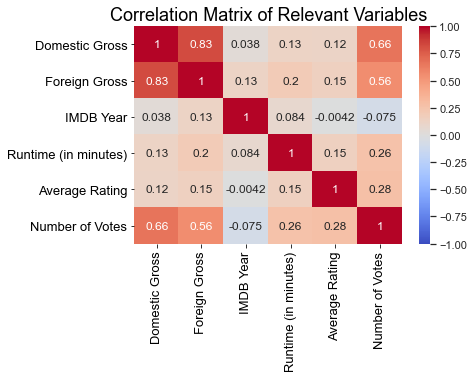

In [18]:
ax = plt.axes()
sns.set(font_scale = 1)
sns.heatmap(alljoined.corr(), ax = ax, annot = True, vmin=-1, vmax=1, center= 0, cmap= 'coolwarm')

ax.set_title('Correlation Matrix of Relevant Variables', fontsize = 18)
ax.set_xticklabels(ax.get_xticklabels(), fontsize = 13)
ax.set_yticklabels(ax.get_yticklabels(), fontsize = 13)

#Notable correlations: 
#Domestic & Foreign Gross = .83 
#Num Votes & FG = .56
#Num Votes & DG = .66
#Average Rating & Num Votes = .28

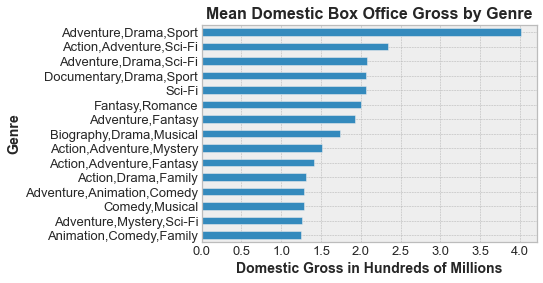

In [19]:
with plt.style.context('bmh'):
    (alljoined.groupby(['Genres'])['Domestic Gross'].mean().sort_values(ascending = False).head(15)/100000000).plot(kind = 'barh')
    plt.title('Mean Domestic Box Office Gross by Genre', fontsize = 16, fontweight = 'bold')
    plt.gca().invert_yaxis()
    plt.xlabel('Domestic Gross in Hundreds of Millions', fontsize = 14, fontweight = 'bold')
    plt.ylabel('Genre', fontsize = 14, fontweight = 'bold') 
    plt.xticks(fontsize = 13)
    plt.yticks(fontsize = 13)
    
# Adventure/Drama/Sport movies make an average of about $400 million in
# the domestic box office 



Genres
Action,Thriller                 448100000.0
Action,Adventure,Comedy         348150000.0
Action,Adventure,Sci-Fi         339725000.0
Adventure,Animation,Comedy      330625000.0
Biography,Drama,Music           216400000.0
                                   ...     
Action                              71900.0
Documentary,History                 26300.0
Biography,Documentary,Family        24500.0
Documentary,Family                  22100.0
Crime                                8100.0
Name: Domestic Gross, Length: 69, dtype: float64

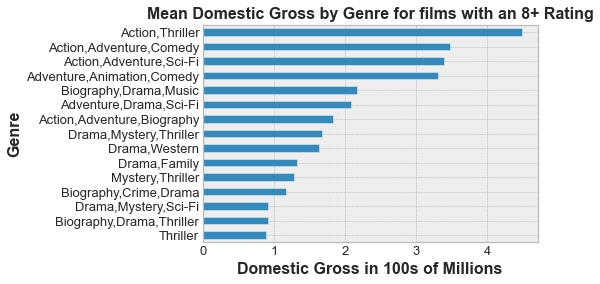

In [20]:
with plt.style.context('bmh'):
    (alljoined_8_or_better.groupby(['Genres'])['Domestic Gross'].mean().sort_values(ascending = False).head(15)/100000000).plot(kind = 'barh')
    plt.title('Mean Domestic Gross by Genre for films with an 8+ Rating', fontsize = 16, fontweight = 'bold')
    plt.gca().invert_yaxis()
    plt.xlabel('Domestic Gross in 100s of Millions', fontsize = 16, fontweight = 'bold')
    plt.ylabel('Genre', fontsize = 16, fontweight = 'bold')
    plt.xticks(fontsize = 13)
    plt.yticks(fontsize = 13)

# Action/Thriller movies with an 8+ rating make an average of $450
# million
#means you can make a high-rated film and make the same 
# amount as Action/Drama/Sport

alljoined_8_or_better.groupby(['Genres'])['Domestic Gross'].mean().sort_values(ascending = False)

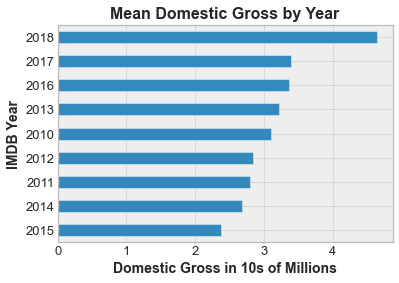

In [21]:
with plt.style.context('bmh'):
    (alljoined.groupby(['IMDB Year'])['Domestic Gross'].mean().sort_values(ascending = False).head(15)/10000000).plot(kind = 'barh')
    plt.title('Mean Domestic Gross by Year', fontsize = 16, fontweight = 'bold')
    plt.gca().invert_yaxis()
    plt.xlabel('Domestic Gross in 10s of Millions', fontsize = 14, fontweight = 'bold')
    plt.ylabel('IMDB Year', fontsize = 14, fontweight = 'bold')
    plt.xticks(fontsize = 13)
    plt.yticks(fontsize = 13)
    
# the average DBO revenue for a movie in 2018 was ~$48 million,
# this number is lower than the mean per genre because it includes
# the lowest-grossing films as well



I created a dataset from the master with data from only 2018, with the intention of exploring how much a film for a certain genre(s) made on average

In [22]:
just2018 = alljoined[alljoined['IMDB Year'] == 2018]

The graph below shows that Action/Adventure/Sci-fi was the highest grossing genre in the highest grossing year, 2018. 

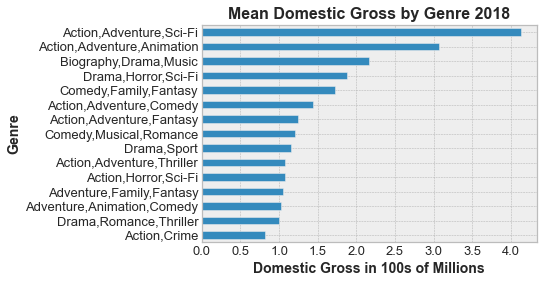

In [23]:
with plt.style.context('bmh'):
    (just2018.groupby(['Genres'])['Domestic Gross'].mean().sort_values(ascending = False).head(15)/100000000).plot(kind = 'barh')
    plt.title('Mean Domestic Gross by Genre 2018', fontsize = 16, fontweight = 'bold')
    plt.gca().invert_yaxis()
    plt.xlabel('Domestic Gross in 100s of Millions', fontsize = 14, fontweight = 'bold')
    plt.ylabel('Genre', fontsize = 14, fontweight = 'bold')
    plt.xticks(fontsize = 13)
    plt.yticks(fontsize = 13)
#Action/Adventure/Sci-fi yet again


I was interested in exploring which genres had the most movies with a "high rating", meaning an 8 or better on IMDB.

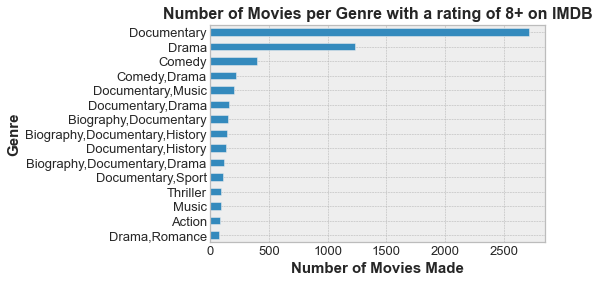

In [24]:
with plt.style.context("bmh"):
    imdb_8_or_better['Genres'].value_counts().head(15).plot(kind = 'barh')
    plt.title('Number of Movies per Genre with a rating of 8+ on IMDB', fontsize = 16, fontweight = 'bold')
    plt.xlabel('Number of Movies Made', fontsize = 15, fontweight = 'bold')
    plt.ylabel('Genre', fontsize = 15, fontweight = 'bold')
    plt.xticks(fontsize = 13)
    plt.yticks(fontsize = 13)
    plt.gca().invert_yaxis()

#if you're after ratings and don't necessarily care about popularity or gross income
#number of votes should be considered for a better idea 


Because of the strong positive correlation between Number of Votes and Domestic Box Office Gross, I decided to explore which genres garnered the most votes. 

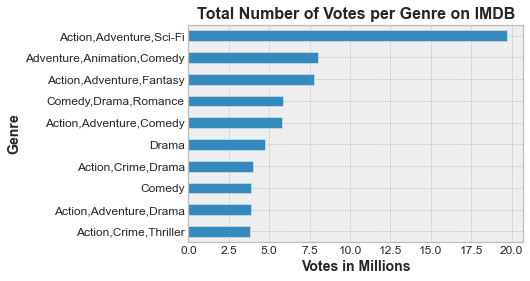

In [25]:
with plt.style.context('bmh'):
    (alljoined.groupby(['Genres'])['Number of Votes'].sum().sort_values(ascending = False).head(10)/1000000).plot(kind = 'barh')
    plt.title('Total Number of Votes per Genre on IMDB', fontsize = 16, fontweight = 'bold')
    plt.gca().invert_yaxis()
    plt.xlabel('Votes in Millions', fontsize = 14, fontweight = 'bold')
    plt.ylabel('Genre', fontsize = 14, fontweight = 'bold')
    plt.xticks(fontsize = 12)
    plt.yticks(fontsize = 12)
#Action/Adventure/Sci-fi

I was interested in which production studios had the highest Domestic Box Office revenue, and which of their movies did best. I took the mean Domestic Gross for each studio rather than the sum, because an individual studio might not make many movies, or have a couple that did well. This gives a better idea of how much an individual film might make. 

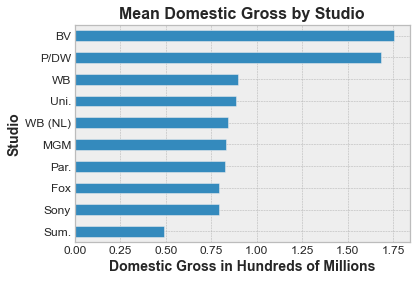

In [26]:
with plt.style.context('bmh'):
    (alljoined.groupby(['Studio'])['Domestic Gross'].mean().sort_values(ascending = False).head(10)/100000000).plot(kind = 'barh')
    plt.title('Mean Domestic Gross by Studio', fontsize = 16, fontweight = 'bold')
    plt.gca().invert_yaxis()
    plt.xlabel('Domestic Gross in Hundreds of Millions', fontsize = 14, fontweight = 'bold')
    plt.ylabel('Studio', fontsize = 14, fontweight = 'bold')
    plt.xticks(fontsize = 12)
    plt.yticks(fontsize = 12)

The top 3 studios that made the most money in the Domestic Box Office are BV, Paramount/Dreamworks, and WB. I created 3 separate dataframes to analyze each studio individually. I discovered that there were some duplicate titles for films, which led to outliers on the graphs, so I dropped them.  

In [27]:
BVonly = alljoined[alljoined['Studio']== 'BV']
PDWonly = alljoined[alljoined['Studio']== 'P/DW']
WBonly = alljoined[alljoined['Studio']== 'WB']

In [28]:
PDWonly.dropna()
WBonly.dropna()
BVonly.dropna()

,Title,Studio,Domestic Gross,Foreign Gross,tconst,Original Title,IMDB Year,Runtime (in minutes),Genres,Average Rating,Number of Votes
0,Toy Story 3,BV,415000000.0,652000000.0,tt0435761,Toy Story 3,2010,103.0,"Adventure,Animation,Comedy",8.3,682218.0
5,Tangled,BV,200800000.0,391000000.0,tt0398286,Tangled,2010,100.0,"Adventure,Animation,Comedy",7.8,366366.0
11,Prince of Persia: The Sands of Time,BV,90800000.0,245600000.0,tt0473075,Prince of Persia: The Sands of Time,2010,116.0,"Action,Adventure,Fantasy",6.6,254975.0
31,The Sorcerer's Apprentice,BV,63200000.0,152100000.0,tt0963966,The Sorcerer's Apprentice,2010,109.0,"Action,Adventure,Family",6.1,143862.0
68,The Last Song,BV,63000000.0,26100000.0,tt1294226,The Last Song,2010,107.0,"Drama,Music,Romance",6.0,74914.0
...,...,...,...,...,...,...,...,...,...,...,...
2753,Ralph Breaks the Internet,BV,201100000.0,328100000.0,tt5848272,Ralph Breaks the Internet,2018,112.0,"Adventure,Animation,Comedy",7.1,85694.0
2757,Solo: A Star Wars Story,BV,213800000.0,179200000.0,tt3778644,Solo: A Star Wars Story,2018,135.0,"Action,Adventure,Fantasy",7.0,226243.0
2763,Mary Poppins Returns,BV,172000000.0,177600000.0,tt5028340,Mary Poppins Returns,2018,130.0,"Comedy,Family,Fantasy",6.9,52103.0
2774,The Nutcracker and the Four Realms,BV,54900000.0,119100000.0,tt5523010,The Nutcracker and the Four Realms,2018,99.0,"Adventure,Family,Fantasy",5.5,18734.0


Top Grossing BV Films:
Black Panther made $700,100,000.00
Avengers: Infinity War made $678,800,000.00
Star Wars: The Last Jedi made $620,200,000.00
Incredibles 2 made $608,600,000.00
Rogue One: A Star Wars Story made $532,200,000.00


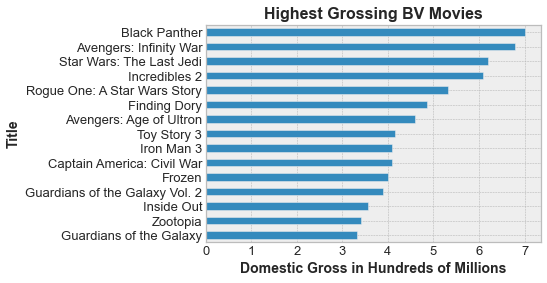

In [123]:
BVonly = BVonly.drop_duplicates(subset = 'Title')
        

with plt.style.context('bmh'):
    (BVonly.groupby(['Title'])['Domestic Gross'].sum().sort_values(ascending = False).head(15)/100000000).plot(kind = 'barh')
    plt.title('Highest Grossing BV Movies', fontsize = 16, fontweight = 'bold')
    plt.gca().invert_yaxis()
    plt.xlabel('Domestic Gross in Hundreds of Millions', fontsize = 14, fontweight = 'bold')
    plt.ylabel('Title', fontsize = 14, fontweight = 'bold')
    plt.xticks(fontsize = 13)
    plt.yticks(fontsize = 13)
    
BVlist = BVonly.groupby(['Title'])['Domestic Gross'].sum().sort_values(ascending = False).head(5)

print('Top Grossing BV Films:')
for index, val in BVlist.iteritems():
    print(index, "made", "${:,.2f}".format(val))

Top Grossing Paramount/Dreamworks Films:
Transformers: Dark of the Moon made $352,400,000.00
Shrek Forever After made $238,700,000.00
How to Train Your Dragon made $217,600,000.00
Madagascar 3: Europe's Most Wanted made $216,400,000.00
Kung Fu Panda 2 made $165,200,000.00


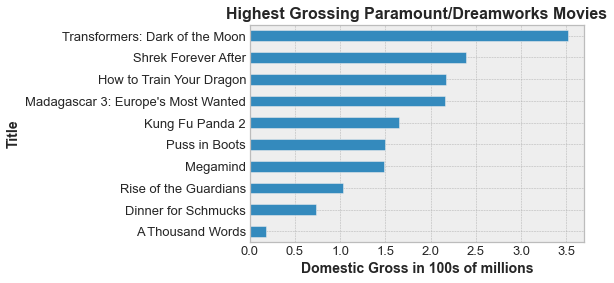

In [122]:
PDWonly = PDWonly.drop_duplicates(subset = 'Title')

with plt.style.context('bmh'):
    (PDWonly.groupby(['Title'])['Domestic Gross'].sum().sort_values(ascending = False).head(15)/100000000).plot(kind = 'barh')
    plt.title('Highest Grossing Paramount/Dreamworks Movies', fontsize = 16, fontweight = 'bold')
    plt.gca().invert_yaxis()
    plt.xlabel('Domestic Gross in 100s of millions', fontsize = 14, fontweight = 'bold')
    plt.ylabel('Title', fontsize = 14, fontweight = 'bold')
    plt.xticks(fontsize = 13)
    plt.yticks(fontsize = 13)
    
PDWlist = PDWonly.groupby(['Title'])['Domestic Gross'].sum().sort_values(ascending = False).head(5)

print('Top Grossing Paramount/Dreamworks Films:')
for index, val in PDWlist.iteritems():
    print(index, "made", "${:,.2f}".format(val))

Top Grossing WB Films:
The Dark Knight Rises made $448,100,000.00
Wonder Woman made $412,600,000.00
American Sniper made $350,100,000.00
Aquaman made $335,100,000.00
Batman v Superman: Dawn of Justice made $330,400,000.00


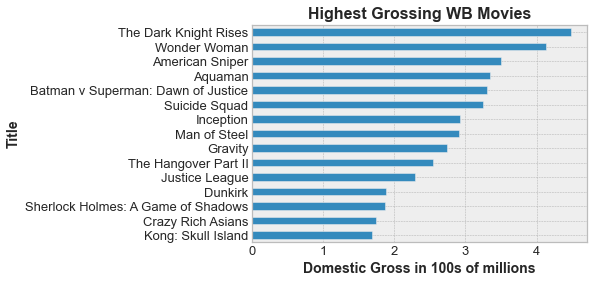

In [124]:
WBonly = WBonly.drop_duplicates(subset = 'Title')

with plt.style.context('bmh'):
    (WBonly.groupby(['Title'])['Domestic Gross'].sum().sort_values(ascending = False).head(15)/100000000).plot(kind = 'barh')
    plt.title('Highest Grossing WB Movies', fontsize = 16, fontweight = 'bold')
    plt.gca().invert_yaxis()
    plt.xlabel('Domestic Gross in 100s of millions', fontsize = 14, fontweight = 'bold')
    plt.ylabel('Title', fontsize = 14, fontweight = 'bold')
    plt.xticks(fontsize = 13)
    plt.yticks(fontsize = 13)

WBlist = WBonly.groupby(['Title'])['Domestic Gross'].sum().sort_values(ascending = False).head(5)

print('Top Grossing WB Films:')
for index, val in WBlist.iteritems():
    print(index, "made", "${:,.2f}".format(val))

# Results

All data, unless specified, covers the time frame of 2010-2018

## Notable Correlations:

Domestic Gross & Foreign Gross have a strong positive correlation of .83. This indicates that films that do well in the Domestic Box Office will do well in the Foreign Box Office. 

Number of Votes & Domestic Gross have a moderate-strong positive correlation of .66. This means that more votes on IMDB tend to lead to a higher Domestic revenue. 

The correlation between Number of Votes & Foreign Gross is a little weaker, at .56, but still notable. 

Finally, Average Rating and Number of Votes have a mild positive correlation of .28, meaning that films with a higher rating can bring in more votes, or vice versa. 



-----------------------------------------------------------------

The first bar graph "Mean Domestic Box Office Gross by Genre" represents the mean Domestic Gross of the highest-grossing genres from 2010-2018. Adventure/Drama/Sport films blew the rest out of the water and made the most money at $400,700,000.


The graph "Mean Domestic Gross by Genre for films with an 8+ Rating" displayed that the average Domestic Gross for Action/Thriller movies with a high rating was $448,100,000.


"Mean Domestic Gross by Year" depicted the average Domestic Gross a film made for each year from 2010-2018. The year 2018 had the highest average Domestic Gross of $46,349,360. This number seemed low compared to the other graphs, but that's because the average was affected by low-grossing films. 

"Mean Domestic Gross by Genre 2018" shows the average Domestic Gross a film from a certain genre(s) made in the year 2018. Again, Action/Adventure/Sci-fi makes the highest grossing films on average with a Domestic Gross of $412,300,000.

The bar graph "Number of Movies per Genre with a rating of 8+ on IMDB" shows that Documentaries have the most movies with a rating of 8+ at 2715 films. 

However, they don't get many voters, it doesn't appear on the graph "Total Number of Votes per Genre on IMDB". Again, Action/Adventure/Sci-fi had a giant lead with a total of 19,721,992 votes. Adventure/Animation/Comedy had 8,037,681 votes, and Action/Adventure/Comedy had 7,763,568.

"Mean Domestic Gross by Studio" determined that BV, P/DW and WB made the most money per film on average in the Domestic Box Office. 

BV:   $ 175,240,200 

P/DW: $ 168,290,000

WB:   $ 89,799,160

-----------------------------------------------------------------
The 5 Highest Grossing BV movies are: 

    Black Panther:                  $700,100,000
Avengers: Infinity War:         $678,800,000
    Star Wars: The Last Jedi:       $620,200,000
Incredibles 2:                  $608,600,000
    Rogue One: A Star Wars Story    $532,200,000

-----------------------------------------------------------------

The 5 Highest Grossing P/DW movies are: 

    Transformers: Dark of the Moon:        $352,400,000
Shrek Forever After:                   $238,700,000
    How to Train Your Dragon:              $217,600,000
Madagascar 3: Europe's Most Wanted:    $216,400,000
    Kung Fu Panda 2:                       $165,200,000

-----------------------------------------------------------------

The 5 Highest Grossing WB movies are:

    The Dark Knight Rises:              $448,100,000
Wonder Woman:                       $412,600,000
    American Sniper:                    $350,100,000
Aquaman:                            $335,100,000
    Batman v Superman: Dawn of Justice: $330,400,000
    

Looking at the Top 3 Studios, one thing their highest-grossing films have in common is that almost all of them are sequels, or are part of a franchise series like BV's Marvel and Star Wars, and WB's DC movies. Comic/superhero movies make Paramount/Dreamworks seems to have a niche with animated children's films, 4 out of their top 5 grossing films are animated, except Transformers: Dark of the Moon, a sequel of the Transformers franchise. 

## Conclusions

Action/Drama/Sport films make the most money in the box office overall. I would recommend 

Action/Adventure/Sci-Fi films such as the Marvel and DC franchises are the 2nd highest grossing genre in the Domestic Box Office. They make the most money on average, and they garner the most votes on IMDB, indicating how popular these films are. Action/Adventure/Animation is the third-highest-grossing genre, as reflected by the Paramount and Dreamworks' top-grossing films. I would recommend that Microsoft invest in franchises that has the potential for sequels, perhaps based on another poplar comic book series, and also invest in animated children's films like Paramount and Dreamworks. 

However, not everyone likes those genres, even if they are the most popular. For films other than franchises and sequels, Action/Thriller films made the most money on average while also keeping an average rating of 8+. Documentaries are also the most highly-rated genre on IMDB, although they aren't as popular. I would recommend that Microsoft also invest in independent filmmakers for Documentaries, which could get them recognition, prestige, and potential film awards, which never hurts a company.

In regards to limitations to this project, I would have liked to see more recent data, because it's difficult to think about the movie industry in 2021 without acknowledging how it was affected by the Pandemic. I know that many streaming services released their films at home as well as in theaters, and I would have loved to look at the revenue made from streaming vs. what was made in the Box Office. It's hard to say whether this will be how movies are released in the future, since we are still battling Covid-19. 